**The Candy Hierarchy project is an annual survey conducted by researchers at the University of British Columbia to gather data on people's preferences for Halloween candy. This lighthearted and satirical study aims to create a comprehensive ranking of various candies and treats commonly distributed during trick-or-treating.**

In [1]:
import pandas as pd
import numpy as np

The first thing we need to do is read in the data and take a peek at what we're working with. From pandas, call `read_csv()` on `pd` to grab the data we need.

In [2]:
filename = "/kaggle/input/halloween-candy-heir-data/BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.csv"
# Insert Code Below
df = pd.read_csv(filename)
df_all = df # copy of the dataframe for my future use.
df.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,10/24/2016 5:09:23,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
1,10/24/2016 5:09:55,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2,10/24/2016 5:13:07,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN
3,10/24/2016 5:14:17,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,South to North,Science: Latest News and Headlines,NaN
4,10/24/2016 5:14:25,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,ESPN,NaN


There's a lot going on in this file... Let's first limit our scope. We're interested in seeing the average score of people divided by gender for any full size candy bar. We'll first rename the columns of interest below. Pass `new_column_names` to the `rename` function.

In [3]:
# Dictonary to store the old -> new name mapping
new_column_names = {
    'Which country do you live in?' : 'Country',
    'Timestamp' : 'ts',
    'Your gender:' : 'gender',
    'How old are you?' : 'age',
    ' [Any full-sized candy bar]' : 'candy_rating'
}
#Pandas function to rename the specified columns. the 'Inplace' parameter is to change 
# the dataframe we're calling rename on, rather than just return a adjusted copy.
# Insert Code Below
df.rename(columns=new_column_names, inplace= True) 
df.head

<bound method NDFrame.head of                        ts  \
0      10/24/2016 5:09:23   
1      10/24/2016 5:09:55   
2      10/24/2016 5:13:07   
3      10/24/2016 5:14:17   
4      10/24/2016 5:14:25   
...                   ...   
1254  10/29/2016 16:53:53   
1255   10/30/2016 6:53:55   
1256  10/30/2016 11:06:11   
1257  10/30/2016 16:07:27   
1258  10/30/2016 17:06:46   

     Are you going actually going trick or treating yourself?  gender  age  \
0                                                    No          Male   22   
1                                                    No          Male   45   
2                                                    No        Female   48   
3                                                    No          Male   57   
4                                                   Yes          Male   42   
...                                                 ...           ...  ...   
1254                                                 No        Female   52 

Now we'll narrow down to only the columns of interest, those we mapped in the dictonary. Call `head()` on the resulting df to display the current dataset.

In [4]:
df = df[new_column_names.values()]
# Input Code Here
df.head

<bound method NDFrame.head of             Country                   ts  gender  age candy_rating
0            Canada   10/24/2016 5:09:23    Male   22          JOY
1               usa   10/24/2016 5:09:55    Male   45          JOY
2                US   10/24/2016 5:13:07  Female   48          JOY
3               usa   10/24/2016 5:14:17    Male   57          JOY
4               USA   10/24/2016 5:14:25    Male   42          JOY
...             ...                  ...     ...  ...          ...
1254            USA  10/29/2016 16:53:53  Female   52          JOY
1255  united states   10/30/2016 6:53:55    Male   33          JOY
1256            NaN  10/30/2016 11:06:11    Male  NaN          JOY
1257         canada  10/30/2016 16:07:27    Male   48          JOY
1258             Us  10/30/2016 17:06:46  Female   44          JOY

[1259 rows x 5 columns]>

Great! That's a little more clear. Let's explore the values we have for each column, starting with gender. We can do this by calling `unique()` on the specific column, do so below.

In [5]:
# Insert Code Below
df['gender'].unique()

array(['Male', 'Female', 'Other', "I'd rather not say", nan], dtype=object)

Looking at those values, the last one is a `nan` or 'not a number'. This means there isn't a usable value here for us to work with. We can check for these values directly by calling `isnull()`, follow by an`any()` that will check if any values in the column are not usable.

In [6]:
# Insert Code Below
df['gender'].isnull().any()

True

Yep, we'll need to deal with those values. Let's quickly check the `candy_rating` column too, just to see what we're working with.

In [7]:
# Your Code Here ..
df['candy_rating'].unique()

array(['JOY', 'MEH', nan, 'DESPAIR'], dtype=object)

In [8]:
df['candy_rating'].isnull().any()

True

Looks like we have lots of nulls throughout the data. Luck for us, we can just drop those rows that have incomplete data. We can use the `dropna()` function to remove these values. Then, we'll check to see if those values were taken care of. 

In [9]:
df.dropna(inplace=True)
print ("Gender: " + str(df['gender'].isnull().any()))
print ("Candy Rating: " + str(df['candy_rating'].isnull().any()))

Gender: False
Candy Rating: False


<ipython-input-9-8064888e6852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Great! Let's look at the data again.

In [10]:
df.head()

,Country,ts,gender,age,candy_rating
0,Canada,10/24/2016 5:09:23,Male,22,JOY
1,usa,10/24/2016 5:09:55,Male,45,JOY
2,US,10/24/2016 5:13:07,Female,48,JOY
3,usa,10/24/2016 5:14:17,Male,57,JOY
4,USA,10/24/2016 5:14:25,Male,42,JOY


Awesome! Now, let's make sure the age category has correct values. Call `unique()` on the `age` column

In [11]:
# Insert Code Below
df['age'].unique()

array(['22', '45', '48', '57', '42', '41', '47', '28', '44', '34', '46',
       '40', '31', '33', '35', '49', '16', '60', '30', '51', '38', '54',
       '43', '50', '37', '55', '58', '32', 'Old enough to know better ',
       '64', '61', '65', '26', '36', '39', '52', '29', '63', 'old enough',
       'As old as my tongue a few years older than my teeth', '50s',
       'old', '10', '62', '0x2A', '23', '20', '24', '17', '27', '53',
       '18', '13', '56', '66', 'Fifty.  Nine.  Ish.', '25', '59', '74',
       '19', 'Ancient', 'I remember the Nixon administration', '14', '79',
       'Old enough', '50+', '70', '55+', 'over 40', 'Hahahahahaha', '68',
       '81', '1E+18', 'Old', 'Older than i act', 'really old', '12', '67',
       'blah', '23.2', '11', 'older than I want to be', '21', '71',
       'Not as old as you...', '82', 'Never ask a woman that question.',
       'old ', 'Same as yo mama', '15',
       'Too old to trick or treat without it being creepy', 'ancient',
       '142', '7', 

That's... not helpful. Let's just work with those that gave only a numeric value. Call the `isnumeric()` function on the age column. 
<br>
We'll also need to make sure the ages are within expected ranges. We only want adults (18+) and a quick google has the oldest person in the world at 122, so we also want to limit the ages to 18-122.

In [12]:
# Insert Code Below
df = df[(df['age'].str.isnumeric())]
# Insert Code Below
df = df[(df['age'].astype(int) <= 122) & (df['age'].astype(int) >= 18)]

Last but not least, we'll need to map those string values in the candy_rating column to numerics. We can do that by calling `replace()`

In [13]:
# Insert Code Below
clean_df = df.replace(df['candy_rating'].unique(), range(2,-1,-1))
clean_df.head(10)

,Country,ts,gender,age,candy_rating
0,Canada,10/24/2016 5:09:23,Male,22,2
1,usa,10/24/2016 5:09:55,Male,45,2
2,US,10/24/2016 5:13:07,Female,48,2
3,usa,10/24/2016 5:14:17,Male,57,2
4,USA,10/24/2016 5:14:25,Male,42,2
5,USA,10/24/2016 5:16:43,Male,41,2
6,usa,10/24/2016 5:16:51,Male,47,2
7,Canada,10/24/2016 5:16:55,Male,28,2
8,USA,10/24/2016 5:17:49,Male,44,2
9,UK,10/24/2016 5:18:51,Female,41,2


Let's now try to clean the 'Country' column. We check the individual counts using the `value_counts()` method on the column.

In [14]:
# Insert code below
clean_df['Country'].value_counts(dropna='False')

Country
USA              409
United States    177
usa              120
Canada            93
US                84
                ... 
France             1
hungary            1
America            1
UK                 1
United State       1
Name: count, Length: 78, dtype: int64

Next we will convert the column values in lower case and then check the individual counts again using the `value_counts()` method on the column.

In [15]:
# Insert code below:
clean_df['Country'] = clean_df['Country'].astype(str).str.lower()

clean_df['Country'].value_counts(dropna='False')

Country
usa                            558
united states                  197
us                             121
canada                         111
united states of america        31
usa                             15
united states                   11
uk                               9
u.s.                             8
u.s.a.                           5
japan                            4
england                          4
germany                          4
united kingdom                   4
mexico                           3
new zealand                      3
australia                        3
america                          3
france                           3
united states of america         3
murica                           3
merica                           2
usa! usa! usa!                   2
finland                          1
eua                              1
usa! usa!                        1
sweden                           1
canada                           1
united sates

We see that almost all the country names have now been listed under 'usa'. We will now aim to get a list of all the wrong names in the column which have more than (or equal to) 5 occurrences.

In [16]:
wrong_names = clean_df['Country'].value_counts()[clean_df['Country'].value_counts().values >= 5].index
wrong_names

Index(['usa', 'united states', 'us', 'canada', 'united states of america',
       'usa ', 'united states ', 'uk', 'u.s.', 'u.s.a.'],
      dtype='object', name='Country')

This list contains all the wrong country names with 5 or more occurrences. We will replace most of these country names with standard names using `.loc()` and `.isin()`  methods to replace all the different ways 'United States' is present in the 'wrong_names' list with a standard name.

In [17]:
# removing 'canada' and 'uk' from the list (Insert code below:)
wrong_names = [name for name in wrong_names if name not in ['canada', 'uk']]

standard_name = 'United States'

clean_df.loc[clean_df['Country'].isin(wrong_names), 'Country'] = standard_name

clean_df['Country'].value_counts(dropna='False')

Country
United States                  946
canada                         111
uk                               9
united kingdom                   4
japan                            4
england                          4
germany                          4
america                          3
new zealand                      3
mexico                           3
murica                           3
australia                        3
united states of america         3
france                           3
usa! usa! usa!                   2
merica                           2
united sates                     1
eua                              1
usa! usa!                        1
sweden                           1
canada                           1
china                            1
the netherlands                  1
finland                          1
philippines                      1
kenya                            1
the republic of cascadia         1
united stetes                    1
usa usa usa 

### Continue with your code below this

In [18]:
clean_df.to_csv('cleaned_dataset')

**I AM REPLACING THE COLUMN NAMES TO INCREASE THE READABILITY OF THE DATA SET AND ALSO USE LESS MEMORY.**

In [19]:

new_column_names = {
    'Are you going actually going trick or treating yourself?':'r_u_going?',
    'Which country do you live in?' : 'Country',
    'Timestamp' : 'ts',
    'Your gender:' : 'gender',
    'How old are you?' : 'age',
    ' [Any full-sized candy bar]' : 'candy_rating',
    'Which state, province, county do you live in?':'address',
    'Please list any items not included above that give you JOY.':'other_joy',
    'Please list any items not included above that give you DESPAIR.':'other_dispair',
    'Please leave any witty, snarky or thoughtful remarks or comments regarding your choices.':'comments',
    '"That dress* that went viral a few years back - when I first saw it, it was ________"':'dress_color',
    'Which day do you prefer, Friday or Sunday?':'preferred_day',
    'Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?':'how_to_eat_apple',
    'When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).':'select_image'
    }
print("Original column names:", df_all.columns.tolist()) # before replacing
df_all.rename(columns=new_column_names, inplace=True) # after replacing
print("Renamed column names:", df_all.columns.tolist())

Original column names: ['ts', 'Are you going actually going trick or treating yourself?', 'gender', 'age', 'Country', 'Which state, province, county do you live in?', ' [100 Grand Bar]', ' [Anonymous brown globs that come in black and orange wrappers]', 'candy_rating', ' [Black Jacks]', ' [Bonkers (the candy)]', ' [Bonkers (the board game)]', ' [Bottle Caps]', " [Box'o'Raisins]", ' [Broken glow stick]', ' [Butterfinger]', ' [Cadbury Creme Eggs]', ' [Candy Corn]', ' [Candy that is clearly just the stuff given out for free at restaurants]', ' [Caramellos]', ' [Cash, or other forms of legal tender]', ' [Chardonnay]', ' [Chick-o-Sticks (we don’t know what that is)]', ' [Chiclets]', ' [Coffee Crisp]', ' [Creepy Religious comics/Chick Tracts]', ' [Dental paraphenalia]', ' [Dots]', ' [Dove Bars]', ' [Fuzzy Peaches]', ' [Generic Brand Acetaminophen]', ' [Glow sticks]', ' [Goo Goo Clusters]', " [Good N' Plenty]", ' [Gum from baseball cards]', ' [Gummy Bears straight up]', ' [Hard Candy]', ' [He

In [20]:
null_counts = df_all.isnull().sum()
for column, null_count in null_counts.items():
    print(f"{column}: {null_count}")

ts: 0
r_u_going?: 0
gender: 9
age: 33
Country: 21
address: 79
 [100 Grand Bar]: 78
 [Anonymous brown globs that come in black and orange wrappers]: 26
candy_rating: 17
 [Black Jacks]: 203
 [Bonkers (the candy)]: 221
 [Bonkers (the board game)]: 232
 [Bottle Caps]: 79
 [Box'o'Raisins]: 29
 [Broken glow stick]: 33
 [Butterfinger]: 23
 [Cadbury Creme Eggs]: 21
 [Candy Corn]: 17
 [Candy that is clearly just the stuff given out for free at restaurants]: 28
 [Caramellos]: 79
 [Cash, or other forms of legal tender]: 22
 [Chardonnay]: 57
 [Chick-o-Sticks (we don’t know what that is)]: 211
 [Chiclets]: 53
 [Coffee Crisp]: 146
 [Creepy Religious comics/Chick Tracts]: 46
 [Dental paraphenalia]: 32
 [Dots]: 62
 [Dove Bars]: 45
 [Fuzzy Peaches]: 122
 [Generic Brand Acetaminophen]: 68
 [Glow sticks]: 36
 [Goo Goo Clusters]: 176
 [Good N' Plenty]: 77
 [Gum from baseball cards]: 46
 [Gummy Bears straight up]: 35
 [Hard Candy]: 31
 [Healthy Fruit]: 34
 [Heath Bar]: 54
 [Hershey's Dark Chocolate]: 24
 [

**Since there are very high number of was empty observations, dropping the below column.** 

In [21]:
df_all.drop(' [York Peppermint Patties] Ignore',inplace=True,axis=1)
print(df_all.columns.tolist())

['ts', 'r_u_going?', 'gender', 'age', 'Country', 'address', ' [100 Grand Bar]', ' [Anonymous brown globs that come in black and orange wrappers]', 'candy_rating', ' [Black Jacks]', ' [Bonkers (the candy)]', ' [Bonkers (the board game)]', ' [Bottle Caps]', " [Box'o'Raisins]", ' [Broken glow stick]', ' [Butterfinger]', ' [Cadbury Creme Eggs]', ' [Candy Corn]', ' [Candy that is clearly just the stuff given out for free at restaurants]', ' [Caramellos]', ' [Cash, or other forms of legal tender]', ' [Chardonnay]', ' [Chick-o-Sticks (we don’t know what that is)]', ' [Chiclets]', ' [Coffee Crisp]', ' [Creepy Religious comics/Chick Tracts]', ' [Dental paraphenalia]', ' [Dots]', ' [Dove Bars]', ' [Fuzzy Peaches]', ' [Generic Brand Acetaminophen]', ' [Glow sticks]', ' [Goo Goo Clusters]', " [Good N' Plenty]", ' [Gum from baseball cards]', ' [Gummy Bears straight up]', ' [Hard Candy]', ' [Healthy Fruit]', ' [Heath Bar]', " [Hershey's Dark Chocolate]", ' [Hershey’s Milk Chocolate]', " [Hershey's K

# Missing data imputation - it is a common data preprocessing technique used to handle missing values in a dataset. It involves replacing missing values with estimated or predetermined values to make the dataset suitable for analysis or modeling.

**Since the column gender has very few missing values we will fill them with a generic or a neutral values such as "I'd rather not say".**

In [22]:
print(df_all['gender'].isnull().sum()) # before cleaning
df_all['gender'].fillna("I'd rather not say", inplace=True)
print(df_all['gender'].isnull().sum()) # after cleaning

9
0


In [23]:
print(df_all[['other_joy','other_dispair','comments']].isna().sum())

other_joy        578
other_dispair    701
comments         917
dtype: int64


# Eliminate the Field: If a field/attribute has large amount of missing data and isn't crucial for your evaluation, you might opt to remove the field entirely. This method is appropriate when the field doesn't offer substantial insights or when there are substitute attributes available.

**for all the columns below there are a large number of missing values and they are not very helpful in our analysis, so we are going to drop them.**

In [24]:
# Drop the specified columns
print(df_all.columns.tolist())
df_all.drop(columns=['other_joy','other_dispair','comments'], inplace=True, axis=1)
print(df_all.columns.tolist())

['ts', 'r_u_going?', 'gender', 'age', 'Country', 'address', ' [100 Grand Bar]', ' [Anonymous brown globs that come in black and orange wrappers]', 'candy_rating', ' [Black Jacks]', ' [Bonkers (the candy)]', ' [Bonkers (the board game)]', ' [Bottle Caps]', " [Box'o'Raisins]", ' [Broken glow stick]', ' [Butterfinger]', ' [Cadbury Creme Eggs]', ' [Candy Corn]', ' [Candy that is clearly just the stuff given out for free at restaurants]', ' [Caramellos]', ' [Cash, or other forms of legal tender]', ' [Chardonnay]', ' [Chick-o-Sticks (we don’t know what that is)]', ' [Chiclets]', ' [Coffee Crisp]', ' [Creepy Religious comics/Chick Tracts]', ' [Dental paraphenalia]', ' [Dots]', ' [Dove Bars]', ' [Fuzzy Peaches]', ' [Generic Brand Acetaminophen]', ' [Glow sticks]', ' [Goo Goo Clusters]', " [Good N' Plenty]", ' [Gum from baseball cards]', ' [Gummy Bears straight up]', ' [Hard Candy]', ' [Healthy Fruit]', ' [Heath Bar]', " [Hershey's Dark Chocolate]", ' [Hershey’s Milk Chocolate]', " [Hershey's K

# Standard notation strategy : The approach of standardizing different representations of country names to a uniform notation can be categorized under data normalization. By converting diverse renditions of country names, like "USA", "United States of America", "uSA", etc., to a standardized format such as "United States", this method enhances data integrity and streamlines analytical procedures.

In [25]:
print(clean_df['Country'].unique())


['canada' 'United States' 'uk' 'japan' 'france'
 'united states of america ' 'england' 'switzerland' 'murica'
 'united kingdom' 'usa!' 'korea' 'units states' 'belgium' 'portugal'
 'usa usa usa' 'the best one - usa' 'usa! usa! usa!' 'españa'
 "there isn't one for old men" 'panama' 'the yoo ess of aaayyyyyy'
 'united kindom' 'america' 'hungary' 'america ' 'uk ' 'austria'
 'new zealand' 'germany' 'mexico' 'australia' 'brasil' 'south korea'
 'philippines' ' united states' 'eua' 'usa! usa!' 'sweden' 'canada '
 'united sates' 'the netherlands' 'finland' 'merica' 'china' 'kenya'
 'the republic of cascadia ' 'united stetes' 'usa usa usa usa'
 'new zealand ' 'united  states of america' 'netherlands' 'united state']


**From the above code we can see that multiples representations for the same country are present, we will now make a standard representation of these countries**
 - I HAVE MADE USE OF REGULAR EXPRESSION TO DO THE MAPPING OF MULTIPLE WRONGLY SPELLED COUNTRIY NAMES.

In [26]:
import pandas as pd
import re

# Regular expression patterns to match variations of country names
patterns = {
    'United Kingdom': re.compile(r'\b(?:uk|united kingdom|england|united kindom)\b', re.IGNORECASE),
    'United States': re.compile(r'\b(?:US|america|murica|united states of america|usa! usa! usa!|merica|united sates|usa! usa!|united stetes|usa usa usa usa|the best one - usa|usa!|units states|usa usa usa|the yoo ess of aaayyyyyy|united state|usa|USA)\b', re.IGNORECASE)
}

# Function to map country based on the optimized mapping
def map_country(country):
    if isinstance(country, str):
        for mapped_country, pattern in patterns.items():
            if re.search(pattern, country):
                return mapped_country
    return country  # Return original country if no match is found or if the input is NaN

# Apply the mapping function to the 'Country' column
df_all['Country'] = df_all['Country'].apply(map_country)

# Print the updated 'Country' column
print(df_all['Country'])


0              Canada
1       United States
2       United States
3       United States
4       United States
            ...      
1254    United States
1255    united states
1256              NaN
1257           canada
1258    United States
Name: Country, Length: 1259, dtype: object


In [27]:
print(df_all['address'].isnull().sum())

79


**Dropped the missing values in address column as they were small in number**

In [28]:
# Check the number of null values in the 'address' column
print("Number of null values in 'address' column:", df_all['address'].isnull().sum())

# Drop observations with null values in the 'address' column
df_all.dropna(subset=['address'], inplace=True)



Number of null values in 'address' column: 79


# Drop the Column: If the column with a large number of null values is not critical for your analysis or if it contains mostly missing data, you may choose to drop the column altogether. This approach is suitable when the column doesn't provide significant information or when there are alternative features that can be used instead.

**If more than 50% of the rows are blank in a particular candy's column field, you can drop that column**

In [29]:
# Calculate the percentage of null values in each column
null_percentages = df_all.isnull().mean()

# Get the columns where null percentage is greater than 50%
columns_to_drop = null_percentages[null_percentages > 0.5].index

# Drop the identified columns from the DataFrame
df_all.drop(columns_to_drop, axis=1, inplace=True)

# Print the updated DataFrame
print(df_all)



                       ts r_u_going?  gender age        Country       address  \
0      10/24/2016 5:09:23         No    Male  22         Canada       Ontario   
1      10/24/2016 5:09:55         No    Male  45  United States            il   
2      10/24/2016 5:13:07         No  Female  48  United States      Colorado   
3      10/24/2016 5:14:17         No    Male  57  United States            il   
4      10/24/2016 5:14:25        Yes    Male  42  United States  South Dakota   
...                   ...        ...     ...  ..            ...           ...   
1253  10/29/2016 14:47:44         No    Male  54  United States   wisconisin    
1254  10/29/2016 16:53:53         No  Female  52  United States            TX   
1255   10/30/2016 6:53:55         No    Male  33  united states     minnesota   
1257  10/30/2016 16:07:27         No    Male  48         canada            BC   
1258  10/30/2016 17:06:46        Yes  Female  44  United States            Nh   

      [100 Grand Bar]  \
0 

**I BELIEVE THAT THESE COLUMNS HAVE NOTHING TO DO WITH THE FEELING AFTER EATING A CANDY. SO I WILL BE DROPPING IT.**

In [30]:
# Assuming df is your DataFrame
df_all.drop(df_all.columns[-12:], axis=1, inplace=True)

In [31]:
df_all.to_csv('cleaned_dataset.csv')

Finally! A usable dataset, ready for analysis. Please turn in your completed code for this assignment.

**THE CODE BELOW SHOWS THE CLEANED DATASET**

In [32]:
import pandas as pd

# Read the cleaned dataset into a DataFrame
cleaned_df = pd.read_csv('cleaned_dataset.csv')

# View the first few rows of the DataFrame
cleaned_df.head()

,Unnamed: 0,ts,r_u_going?,gender,age,Country,address,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],candy_rating,...,[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Guess the number of mints in my hand.
0,0,10/24/2016 5:09:23,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,...,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY,200000
1,1,10/24/2016 5:09:55,No,Male,45,United States,il,MEH,MEH,JOY,...,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,17
2,2,10/24/2016 5:13:07,No,Female,48,United States,Colorado,JOY,DESPAIR,JOY,...,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,12
3,3,10/24/2016 5:14:17,No,Male,57,United States,il,JOY,MEH,JOY,...,JOY,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY,3
4,4,10/24/2016 5:14:25,Yes,Male,42,United States,South Dakota,MEH,DESPAIR,JOY,...,JOY,MEH,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH,31


# writeup

**The cleaning process involved several steps to prepare the dataset:**

- **Renaming Columns**: The columns were renamed to improve readability and reduce memory usage. This was done by creating a dictionary mapping the old column names to new names and using the rename() function in pandas.

- **Handling Missing Values**: Missing values were handled by dropping rows with missing data using the dropna() function. This was done for columns such as 'gender' and 'candy_rating'. Additionally, null values in the 'address' column were dropped as they were small in number.

- **Data Normalization**: The 'Country' column had multiple representations of the same country name. Regular expressions were used to standardize these representations to a uniform notation. This was done by creating patterns to match variations of country names and applying a mapping function using the apply() function in pandas.

- **Column Dropping**: Columns with a large number of null values or columns that were not critical for analysis were dropped. This was done using methods such as dropping columns with more than 50% null values and dropping columns that were not relevant for the analysis.

- **Exporting Cleaned Dataset**: Finally, the cleaned dataset was exported to a new CSV file using the to_csv() function in pandas for further analysis.

**Overall, in the cleaning process I successfully prepared the dataset for analysis by addressing missing values, standardizing data representations, and removing irrelevant columns. The cleaning methods used were effective in improving the quality and usability of the dataset for analysis. Methods like, replace(), fillna(),dropna(),unique(),isna(),isnull(),isnumeric(),value_counts(),etc...**

**The reason for the specific cleaning strategies used is tasks is being written above before perforimg the tasks and is written inbetween code cells.**

**Inorder to capture the performance of the data cleaning process we can plot a graph and comment on the same.**

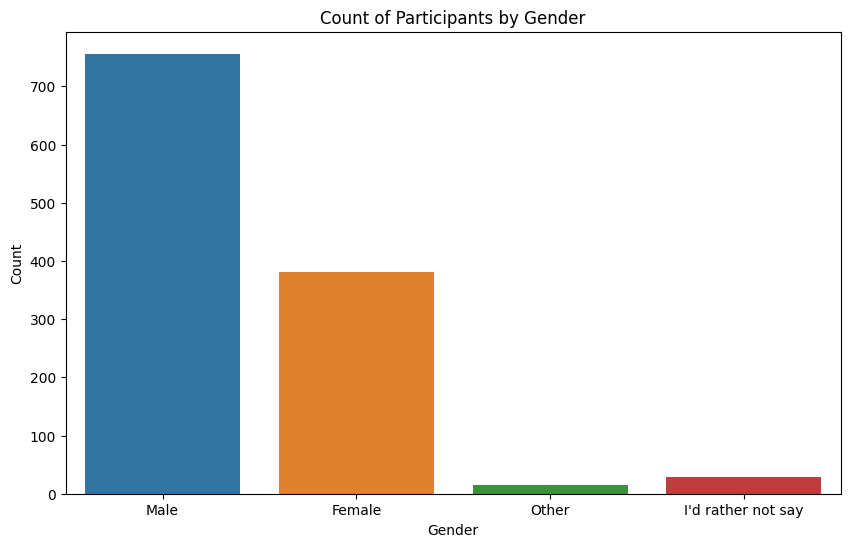

In [33]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for a categorical column
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=df_all)
plt.title('Count of Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


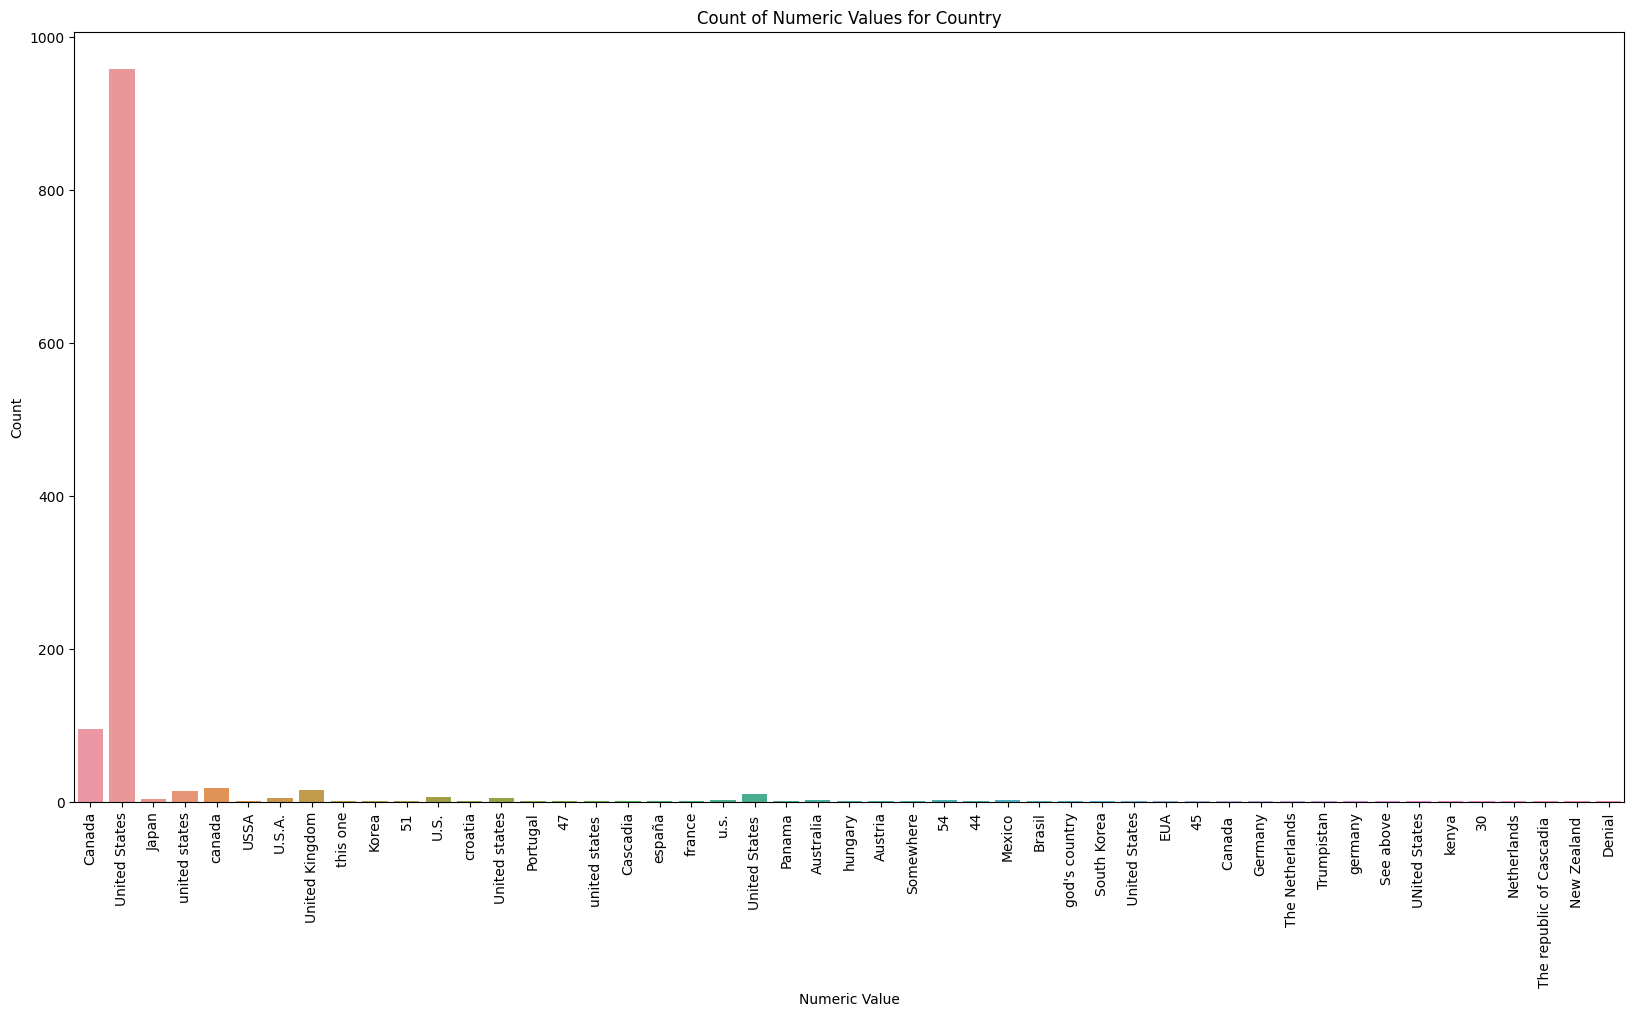

In [34]:
# Plot the count of each numeric value in the 'Country' column
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Country', data=df_all)
plt.title('Count of Numeric Values for Country')
plt.xlabel('Numeric Value')
plt.ylabel('Count')

# Rotate x-axis labels vertically
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()

